<a href="https://colab.research.google.com/github/ja20835/team25.Titanic/blob/main/Team25_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#Data Analysis
import pandas as pd
import numpy as np
pd.set_option('precision', 3)

In [41]:
#Visualisation of Data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [42]:
#Machine-Learning
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [43]:
#github link for data
! git clone https://github.com/ja20835/team25.Titanic.git

fatal: destination path 'team25.Titanic' already exists and is not an empty directory.


In [44]:
#Read data
train = pd.read_csv('team25.Titanic/train.csv')
test = pd.read_csv('team25.Titanic/test.csv')
gender = pd.read_csv('team25.Titanic/gender_submission.csv')

In [45]:
print('Shape of train: ', train.shape, '\n')
print(train.head())

Shape of train:  (891, 12) 

   PassengerId  Survived  Pclass  ...    Fare Cabin  Embarked
0            1         0       3  ...   7.250   NaN         S
1            2         1       1  ...  71.283   C85         C
2            3         1       3  ...   7.925   NaN         S
3            4         1       1  ...  53.100  C123         S
4            5         0       3  ...   8.050   NaN         S

[5 rows x 12 columns]


In [46]:
print('Shape of test: ', test.shape, '\n')
print(test.head())

Shape of test:  (418, 11) 

   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]


In [47]:
combined = [train, test]
print('Length of combined data: ', len(combined))

Length of combined data:  2


In [48]:
def missing_percent(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = round(total * 100 / len(df), 2)
  return pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent(%)'])

In [49]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [50]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [51]:
missing_percent(train)

,Total,Percent(%)
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


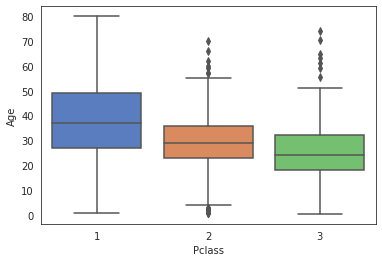

In [52]:
sns.set_style("white")
sns.boxplot(x = 'Pclass', y = 'Age', data=train, palette="muted")
# Show mean age by class for train

In [53]:
def impute_age_train(cols):
  Age = cols [0]
  Pclass = cols [1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 38
    elif Pclass == 2:
        return 30
    else:
          return 25
  else:
        return Age
# Return average age for each class. class1=38. class2=30. class3=25

In [54]:
train['Age']=train[['Age','Pclass']].apply(impute_age_train,axis=1)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
print("Age = ", train.Age.isnull().sum(), "Null Values")
print("Embarked = ", train.Embarked.isnull().sum(), "Null Values")

Age =  0 Null Values
Embarked =  0 Null Values


In [55]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [56]:
missing_percent(test)

,Total,Percent(%)
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


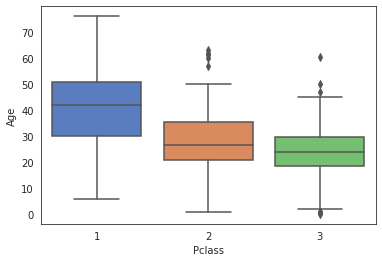

In [57]:
sns.set_style("white")
sns.boxplot(x = 'Pclass', y = 'Age', data=test, palette="muted")
# Show mean age by class for test

In [58]:
def impute_age_test(cols):
  Age = cols [0]
  Pclass = cols [1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 41
    elif Pclass == 2:
        return 29
    else:
          return 24
  else:
        return Age
# Return average age for each class. class1=41. class2=29. class3=24

In [59]:
test['Age']=test[['Age','Pclass']].apply(impute_age_test,axis=1)
test['Fare'].fillna(test['Fare'].mode()[0], inplace = True)
print("Age =", test.Age.isnull().sum(), "Null or NaN Values")
print("Fare =", test.Fare.isnull().sum(), "Null or NaN Values")

Age = 0 Null or NaN Values
Fare = 0 Null or NaN Values


In [60]:
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

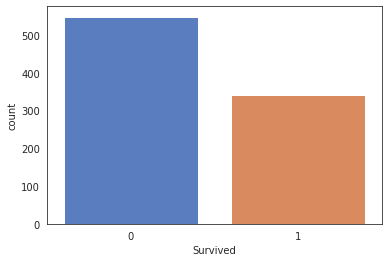

In [61]:
sns.set_style('white')
sns.countplot(x = 'Survived', data=train, palette = "muted")

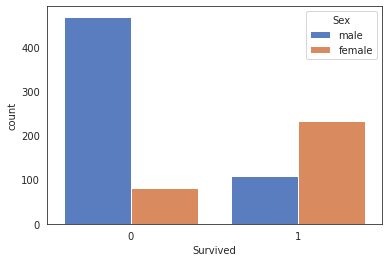

In [62]:
sns.set_style('white')
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = "muted")

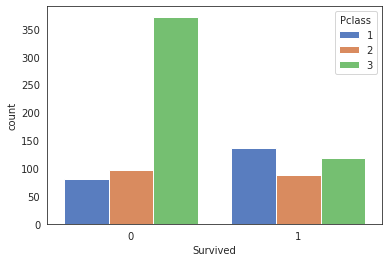

In [63]:
sns.set_style('white')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = "muted")

In [64]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


In [65]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742
1,male,0.189


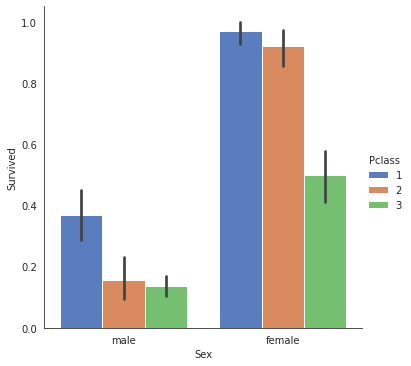

In [66]:
sns.catplot(x = 'Sex', y = 'Survived', hue = 'Pclass', kind = 'bar', data = train, palette = "muted")

In [67]:
train[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.536
2,2,0.464
0,0,0.345
3,3,0.250
4,4,0.167
5,5,0.000
6,8,0.000


In [68]:
train[['Parch','Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600
1,1,0.551
2,2,0.500
0,0,0.344
5,5,0.200
4,4,0.000
6,6,0.000


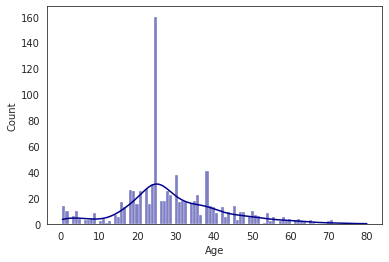

In [69]:
sns.histplot(train['Age'], kde = True, bins = 100, color = 'darkblue')

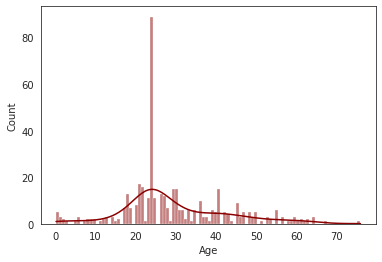

In [70]:
sns.histplot(test['Age'], kde = True, bins = 100, color = 'darkred')

In [71]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,S


In [72]:
sex_train = pd.get_dummies(train['Sex'], sparse = False)
sex_test = pd.get_dummies(test['Sex'], sparse = False)
embarked_train = pd.get_dummies(train['Embarked'], sparse = False)
embarked_test = pd.get_dummies(test['Embarked'], sparse = False)

In [73]:
train.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)
test.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [74]:
train = pd.concat([train, sex_train, embarked_train], axis = 1)
test = pd.concat([test, sex_test, embarked_test], axis = 1)

In [75]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000
male,0.543
female,0.543
Pclass,0.338
Fare,0.257
C,0.168
S,0.150
Parch,0.082
Age,0.050
SibSp,0.035


In [76]:
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']
X_test = test

In [77]:
lRegression = LogisticRegression(max_iter=450)
lRegression.fit(X_train, y_train)
lRegressionY_Predict = lRegression.predict(X_test)
lRegressionAcc = lRegression.score(X_train, y_train)
print('Accuracy with the Logistic Regression model is: ', round(lRegressionAcc, 2))

Accuracy with the Logistic Regression model is:  0.8


In [78]:
dTreeR = DecisionTreeRegressor()
dTreeR.fit(X_train, y_train)
dTreeRY_Predict = dTreeR.predict(X_test)
dTreeRAcc = dTreeR.score(X_train, y_train)
print('Accuracy with the Decision Tree Regressor model is: ', round(dTreeRAcc, 2))

Accuracy with the Decision Tree Regressor model is:  1.0


In [79]:
kNN = KNeighborsClassifier(n_neighbors = 3)
kNN.fit(X_train, y_train)
kNNY_Predict = kNN.predict(X_test)
kNNAcc = kNN.score(X_train, y_train)
print('Accuracy with the k-Nearest Neighbors model is: ', round(kNNAcc, 2))

Accuracy with the k-Nearest Neighbors model is:  0.81


In [80]:
rForest = RandomForestClassifier(n_estimators = 12)
rForest.fit(X_train, y_train)
rForestY_Predict = rForest.predict(X_test)
rForestAcc = rForest.score(X_train, y_train)
print('Accuracy with the Random Forest model is: ', round(rForestAcc, 2))

Accuracy with the Random Forest model is:  0.99


In [81]:
dTree = DecisionTreeClassifier()
dTree.fit(X_train, y_train)
dTreeY_Predict = dTree.predict(X_test)
dTreeAcc = dTree.score(X_train, y_train)
print('Accuracy with the Decision Tree model is: ', round(dTreeAcc, 2))

Accuracy with the Decision Tree model is:  1.0


In [82]:
mlModels = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree Regressor','k-Nearest Neighbor','Random Forest','Decision Tree'],
    'Accuracy Score': [lRegressionAcc, dTreeRAcc, kNNAcc, rForestAcc, dTreeAcc], 
    'Percent (%)': [lRegressionAcc * 100, dTreeRAcc * 100, kNNAcc * 100, rForestAcc * 100, dTreeAcc * 100]})
mlModels.sort_values(by = 'Accuracy Score', ascending = False)

,Model,Accuracy Score,Percent (%)
1,Decision Tree Regressor,1.000,100.000
4,Decision Tree,1.000,100.000
3,Random Forest,0.992,99.214
2,k-Nearest Neighbor,0.807,80.696
0,Logistic Regression,0.804,80.359


In [83]:
new_gender_submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':dTreeY_Predict})
new_gender_submission.to_csv('team25.Titanic/new_gender_submission.csv', index = False)